In [ ]:
from google.colab import files
uploaded = files.upload()

Saving calendar.csv to calendar.csv


# **1. Data Quality Assesment**

Hasil Penilaian Kualitas Data
1. Dataset calendar.csv

   a. Jumlah Data: 1.393.570 baris, 4 kolom

   b. Missing Values: Kolom price memiliki 459.028 nilai yang hilang.

    c. Potensi Inconsistent Entries: Kolom available berbentuk string, perlu dipastikan hanya memiliki nilai valid seperti 't' atau 'f'.

    d. Potensi Outliers: Kolom price (jika berisi nilai numerik setelah pembersihan) bisa diperiksa lebih lanjut.

2. Dataset listings.csv

  a. Jumlah Data: 3.818 baris, 92 kolom

  b. Missing Values: Beberapa kolom yang memiliki banyak nilai hilang:
    * square_feet (hanya 97 data yang tersedia, kemungkinan besar sebagian besar kosong).
    *	license (semua data kosong).

    *Kolom harga (weekly_price, monthly_price, security_deposit, cleaning_fee) memiliki banyak nilai kosong.
    *Beberapa kolom review (review_scores_rating, review_scores_accuracy, dsb.) juga memiliki nilai yang hilang.
  c. Potensi Inconsistent Entries:
   *Format zipcode (kode pos) bisa bervariasi dalam format.

   *Kolom host_response_rate dan host_acceptance_rate berbentuk string, perlu dikonversi ke numerik jika diperlukan.

  d. Potensi Outliers:

   *Kolom harga (price, weekly_price, monthly_price) perlu dicek distribusinya.

   *Kolom minimum_nights dan maximum_nights bisa memiliki outliers ekstrem.
3. Dataset reviews.csv

  a. Jumlah Data: 84.849 baris, 6 kolom

  b. Missing Values: Kolom comments memiliki 18 nilai kosong.

  c. Potensi Inconsistent Entries: Kolom date perlu dicek formatnya agar seragam.

  d. Potensi Outliers: Tidak ada kolom numerik yang signifikan untuk outlier di dataset ini.


In [ ]:
import pandas as pd
from scipy.stats import zscore

# Membaca dataset
calendar_df = pd.read_csv('calendar.csv')
listings_df = pd.read_csv('listings.csv')
reviews_df = pd.read_csv('reviews.csv')

# Cek missing values
print("Missing values in Calendar Dataset:")
print(calendar_df.isnull().sum())
print("Missing values in Listings Dataset:")
print(listings_df.isnull().sum())
print("Missing values in Reviews Dataset:")
print(reviews_df.isnull().sum())

# Format tanggal di calendar_df
calendar_df['date'] = pd.to_datetime(calendar_df['date'], errors='coerce')
inconsistent_dates = calendar_df[calendar_df['date'].isnull()]
print("\nInconsistent Dates in Calendar Dataset:")
print(inconsistent_dates)

# Format harga di listings_df
listings_df['price'] = listings_df['price'].replace('[\$,]', '', regex=True).astype(float)
inconsistent_prices = listings_df[listings_df['price'].isnull()]
print("\nInconsistent Prices in Listings Dataset:")
print(inconsistent_prices)

# Format review_date di reviews_df
inconsistent_reviewers = reviews_df[reviews_df['reviewer_name'].isnull()]
print(inconsistent_reviewers)


# Deteksi outliers menggunakan IQR di listings_df (kolom 'price')
Q1 = listings_df['price'].quantile(0.25)
Q3 = listings_df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = listings_df[(listings_df['price'] < lower_bound) | (listings_df['price'] > upper_bound)]
print("\nOutliers in Listings Dataset (Price) using IQR:")
print(outliers)

# Deteksi outliers menggunakan Z-score di listings_df (kolom 'price')
listings_df['z_score'] = zscore(listings_df['price'])
outliers_z = listings_df[listings_df['z_score'].abs() > 3]
print("\nOutliers in Listings Dataset (Price) using Z-score:")
print(outliers_z)

Missing values in Calendar Dataset:
listing_id         0
date               0
available          0
price         459028
dtype: int64
Missing values in Listings Dataset:
listing_id                            0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64
Missing values in Reviews Dataset:
listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

Inconsistent Dates in Calendar Dataset:
Empty DataFrame
Columns: [listing_id, date, available, price]
Index: []

Inconsistent Prices in Listings Dataset:
Empty DataFrame
Columns: [listing_id, listi

float64
Outliers Dataset:
    listing_id                           listing_url     scrape_id  \
2      3308979  https://www.airbnb.com/rooms/3308979  2.016010e+13   
4       278830   https://www.airbnb.com/rooms/278830  2.016010e+13   
14     5680462  https://www.airbnb.com/rooms/5680462  2.016010e+13   
19     6291829  https://www.airbnb.com/rooms/6291829  2.016010e+13   
22     8942678  https://www.airbnb.com/rooms/8942678  2.016010e+13   

   last_scraped                                 name  \
2      1/4/2016  New Modern House-Amazing water view   
4      1/4/2016       Charming craftsman 3 bdm house   
14     1/4/2016  Stunning 6 bd in THE BEST Location!   
19     1/4/2016   Grand Craftsman Home on Queen Anne   
22     1/4/2016               Lovely Queen Anne home   

                                              summary  \
2   New modern house built in 2013.  Spectacular s...   
4   Cozy family craftman house in beautiful neighb...   
14  Stunning Designsponge featured 6 bed, 3.7

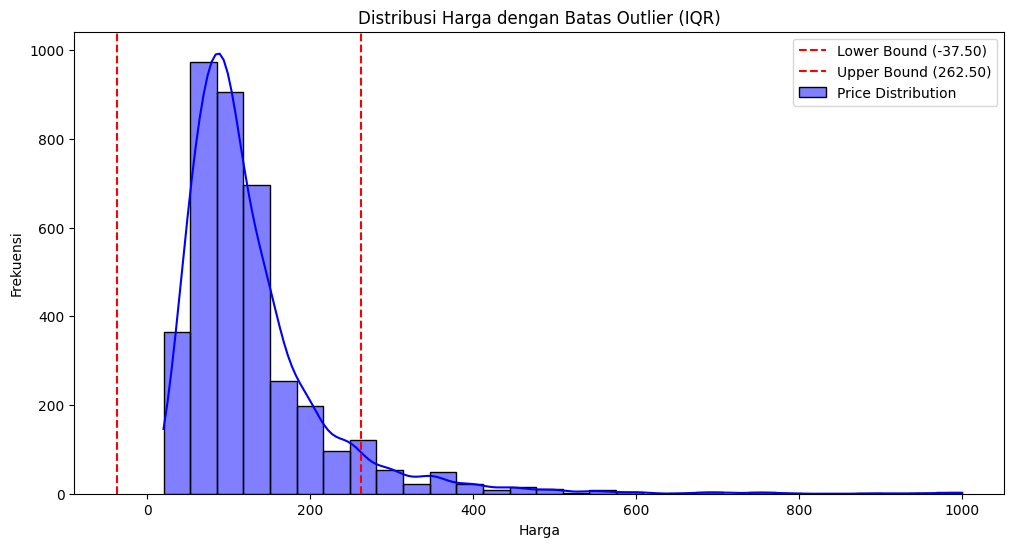

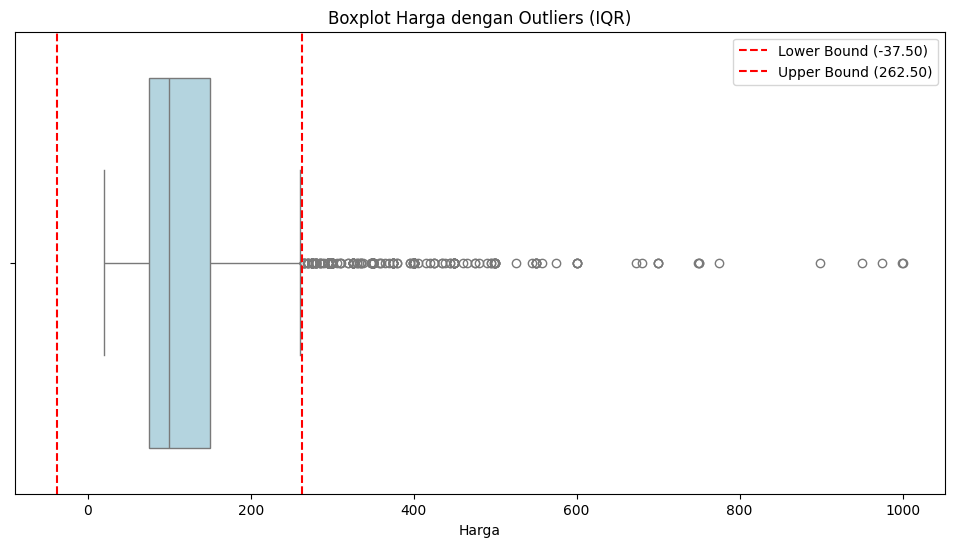

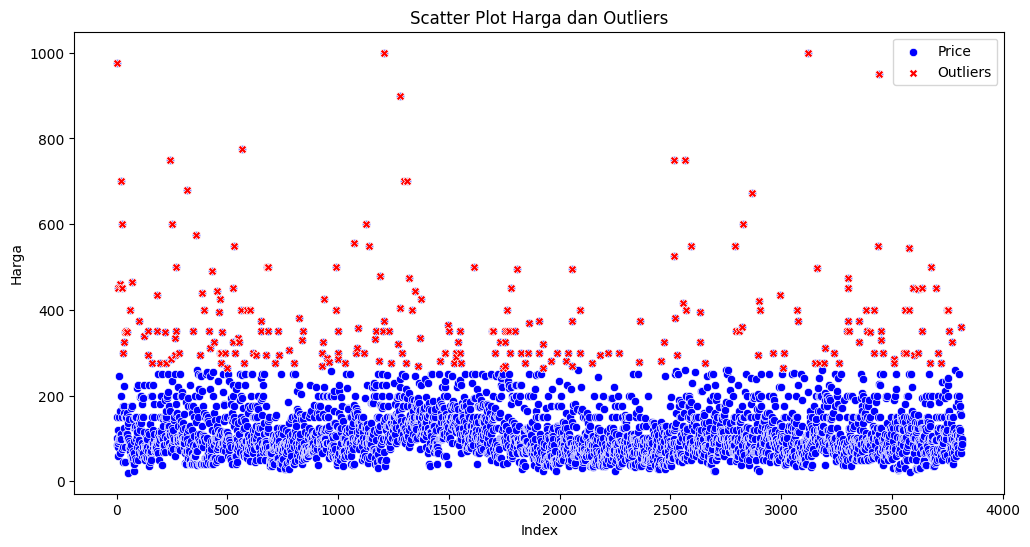

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Membaca dataset
calendar_df = pd.read_csv('calendar.csv')
listings_df = pd.read_csv('listings.csv')
reviews_df = pd.read_csv('reviews.csv')

# Menghapus simbol mata uang dan koma dari kolom 'price', lalu mengonversinya menjadi float
listings_df['price'] = listings_df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Memeriksa kembali tipe data kolom 'price'
print(listings_df['price'].dtype)

# Deteksi outliers menggunakan IQR di listings_df (kolom 'price')
Q1 = listings_df['price'].quantile(0.25)
Q3 = listings_df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = listings_df[(listings_df['price'] < lower_bound) | (listings_df['price'] > upper_bound)]

# Deteksi outliers menggunakan Z-score di listings_df (kolom 'price')
listings_df['z_score'] = zscore(listings_df['price'])
outliers_z = listings_df[listings_df['z_score'].abs() > 3]

# Gabungkan data outliers (baik IQR dan Z-score)
outliers_combined = pd.concat([outliers_iqr, outliers_z]).drop_duplicates()

# Simpan dataset baru yang berisi outliers
outliers_combined.to_csv('listings_outliers.csv', index=False)

# Memeriksa beberapa baris pertama dari dataset outliers yang baru
print("Outliers Dataset:")
print(outliers_combined.head())

# Visualisasi

# 1. Histogram untuk distribusi harga
plt.figure(figsize=(12, 6))
sns.histplot(listings_df['price'], bins=30, kde=True, color='blue', label='Price Distribution')
plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower Bound ({lower_bound:.2f})')
plt.axvline(upper_bound, color='red', linestyle='--', label=f'Upper Bound ({upper_bound:.2f})')
plt.title('Distribusi Harga dengan Batas Outlier (IQR)')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

# 2. Boxplot untuk melihat outliers berdasarkan IQR
plt.figure(figsize=(12, 6))
sns.boxplot(x=listings_df['price'], color='lightblue')
plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower Bound ({lower_bound:.2f})')
plt.axvline(upper_bound, color='red', linestyle='--', label=f'Upper Bound ({upper_bound:.2f})')
plt.title('Boxplot Harga dengan Outliers (IQR)')
plt.xlabel('Harga')
plt.legend()
plt.show()

# 3. Scatter Plot untuk melihat outliers menggunakan Z-score
plt.figure(figsize=(12, 6))
sns.scatterplot(x=listings_df.index, y=listings_df['price'], color='blue', label='Price')
sns.scatterplot(x=outliers_combined.index, y=outliers_combined['price'], color='red', label='Outliers', marker='X')
plt.title('Scatter Plot Harga dan Outliers')
plt.xlabel('Index')
plt.ylabel('Harga')
plt.legend()
plt.show()

# **2. Data Cleaning**

1.	Handling missing values:

 a. Menghapus simbol mata uang dan mengonversi kolom 'price' menjadi tipe data numerik

  b. Mengisi missing values dengan median untuk kolom numerik (contoh kolom harga)

  c. Mengisi missing values pada kolom kategorikal (misalnya, 'room_type')

  d. Mengisi missing values pada kolom tanggal (misalnya, menggunakan '2022-01-01' sebagai placeholder)
2.	Correcting inconsistent entries:

   a. Mengonversi kolom 'date' ke format datetime yang konsisten

   b. Menyamaratakan nilai kategorikal dalam 'room_type

3.	Removing duplicates:

   * Menghapus duplikasi data di dalam dataset.


In [ ]:
import pandas as pd
from scipy.stats import zscore

# Membaca dataset
calendar_df = pd.read_csv('calendar.csv')
listings_df = pd.read_csv('listings.csv')
reviews_df = pd.read_csv('reviews.csv')

# Cek kolom-kolom yang ada di listings_df
print("Kolom-kolom di listings_df:")
print(listings_df.columns)

# 1. Menghapus simbol mata uang dan mengonversi kolom 'price' menjadi tipe data numerik
listings_df['price'] = listings_df['price'].replace('[\$,]', '', regex=True)  # Hapus simbol $
listings_df['price'] = listings_df['price'].astype(float)  # Ubah ke tipe float

# 2. Mengisi missing values dengan median untuk kolom numerik (contoh kolom harga)
listings_df['price'].fillna(listings_df['price'].median(), inplace=True)

# 3. Mengisi missing values pada kolom kategorikal (misalnya, 'room_type')
listings_df['room_type'].fillna('Unknown', inplace=True)

# 4. Mengisi missing values pada kolom tanggal (misalnya, menggunakan '2022-01-01' sebagai placeholder)
calendar_df['date'].fillna('2022-01-01', inplace=True)

# Mengonversi kolom 'date' ke format datetime yang konsisten
calendar_df['date'] = pd.to_datetime(calendar_df['date'], errors='coerce')
reviews_df['date'] = pd.to_datetime(reviews_df['date'], errors='coerce')

# 5. Menyamaratakan nilai kategorikal dalam 'room_type'
listings_df['room_type'] = listings_df['room_type'].str.strip().str.lower()

# 6. Menghapus spasi ekstra pada nama pengulas
reviews_df['reviewer_name'] = reviews_df['reviewer_name'].str.strip().str.title()

# Mengecek duplikasi di setiap dataset
print("Duplikasi pada calendar_df:", calendar_df.duplicated().sum())
print("Duplikasi pada listings_df:", listings_df.duplicated().sum())
print("Duplikasi pada reviews_df:", reviews_df.duplicated().sum())

# Memastikan nama kolom yang benar di listings_df untuk menghapus duplikasi
# Ganti 'listing_id' dengan nama kolom yang benar, misalnya 'id' jika kolom tersebut ada
listings_df.drop_duplicates(subset=['listing_id'], inplace=True)  # Ganti 'id' dengan kolom unik yang sesuai

# Menghapus duplikasi berdasarkan ID review
reviews_df.drop_duplicates(subset=['reviewer_id'], inplace=True)  # Menghapus berdasarkan ID review

# Memeriksa statistik data setelah pembersihan
print("Statistik setelah pembersihan calendar_df:")
print(calendar_df.describe())

print("Statistik setelah pembersihan listings_df:")
print(listings_df.describe())

print("Statistik setelah pembersihan reviews_df:")
print(reviews_df.describe())

# Memeriksa jumlah missing values setelah pembersihan
print("Missing values setelah pembersihan calendar_df:")
print(calendar_df.isnull().sum())

print("Missing values setelah pembersihan listings_df:")
print(listings_df.isnull().sum())

print("Missing values setelah pembersihan reviews_df:")
print(reviews_df.isnull().sum())

# Memeriksa jumlah duplikasi setelah pembersihan
print("Duplikasi setelah pembersihan calendar_df:", calendar_df.duplicated().sum())
print("Duplikasi setelah pembersihan listings_df:", listings_df.duplicated().sum())
print("Duplikasi setelah pembersihan reviews_df:", reviews_df.duplicated().sum())

Kolom-kolom di listings_df:
Index(['listing_id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'be

<ipython-input-9-6293484c72c6>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  listings_df['price'].fillna(listings_df['price'].median(), inplace=True)
<ipython-input-9-6293484c72c6>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

Duplikasi pada calendar_df: 0
Duplikasi pada listings_df: 0
Duplikasi pada reviews_df: 0
Statistik setelah pembersihan calendar_df:
         listing_id                           date
count  1.393570e+06                        1393570
mean   5.550111e+06  2016-07-04 00:00:00.000000256
min    3.335000e+03            2016-01-04 00:00:00
25%    3.258213e+06            2016-04-04 00:00:00
50%    6.118244e+06            2016-07-04 00:00:00
75%    8.035212e+06            2016-10-03 00:00:00
max    1.034016e+07            2017-01-02 00:00:00
std    2.962274e+06                            NaN
Statistik setelah pembersihan listings_df:
         listing_id     scrape_id       host_id  host_listings_count  \
count  3.818000e+03  3.818000e+03  3.818000e+03          3816.000000   
mean   5.550111e+06  2.016010e+13  1.578556e+07             7.157757   
std    2.962660e+06  0.000000e+00  1.458382e+07            28.628149   
min    3.335000e+03  2.016010e+13  4.193000e+03             1.000000   
25%   

# **3. Data Integration**

Berikut adalah langkah-langkah yang dapat Anda ikuti untuk melakukan Data Integration:
1. Identifikasi Kolom Key

   * calendar.csv: Dataset ini kemungkinan memiliki kolom seperti listing_id yang menghubungkan data dengan listings.csv, serta date untuk menghubungkannya dengan data berdasarkan tanggal.

   * listings.csv: Kolom listing_id di sini menjadi kunci utama yang menghubungkan dataset ini dengan dataset lainnya.

   * reviews.csv: Dataset ini kemungkinan memiliki kolom listing_id yang menghubungkannya dengan listings.csv, serta date yang dapat digunakan untuk menghubungkan dengan calendar.csv.

2. Metode Penggabungan

   Anda bisa menggunakan merge() dari Pandas untuk menggabungkan dataset berdasarkan kolom yang relevan. Di sini kita akan menggabungkan:

   * listings_df dan calendar_df berdasarkan listing_id.

   * listings_df dan reviews_df berdasarkan listing_id.

   Penggabungan ini bisa dilakukan dengan menggunakan join kiri (left join) untuk memastikan bahwa semua data dari dataset utama (misalnya listings_df) tetap ada meskipun tidak ada kecocokan di dataset lain.

3. Periksa Konsistensi Format Data
Pastikan bahwa kolom yang digunakan untuk menggabungkan memiliki format yang konsisten di setiap dataset (misalnya, pastikan bahwa listing_id adalah angka atau string yang seragam).

4. Proses Penggabungan

  Berikut adalah contoh kode untuk menggabungkan ketiga dataset tersebut:


In [ ]:
import pandas as pd

# Membaca dataset
calendar_df = pd.read_csv('calendar.csv')
listings_df = pd.read_csv('listings.csv')
reviews_df = pd.read_csv('reviews.csv')

# Periksa kolom-kolom yang ada untuk memastikan kolom yang akan digunakan untuk penggabungan
print(calendar_df.columns)
print(listings_df.columns)
print(reviews_df.columns)

# Menggabungkan 'listings' dengan 'calendar' berdasarkan 'listing_id'
merged_df = pd.merge(calendar_df, listings_df, on='listing_id', how='left')

# Menggabungkan hasil penggabungan sebelumnya dengan 'reviews' berdasarkan 'listing_id'
final_df = pd.merge(merged_df, reviews_df, on='listing_id', how='left')

# Memeriksa hasil penggabungan
print(final_df.head())

Index(['listing_id', 'date', 'available', 'price'], dtype='object')
Index(['listing_id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type',

# **4. Feature Engineering**

Untuk Feature Engineering dengan menggunakan dataset calendar.csv, listings.csv, dan reviews.csv, kita dapat membuat beberapa fitur baru yang bisa meningkatkan kinerja model prediktif. Berikut adalah beberapa langkah yang bisa dilakukan untuk mengolah fitur baru dari data yang sudah ada.

Langkah-langkah:

1. Identifikasi Kolom yang Bisa Dibuat Fitur Baru
Dalam ketiga dataset tersebut, ada beberapa kolom yang dapat digunakan untuk membuat fitur baru, seperti:

 * Price di listings.csv: Dapat digunakan untuk membuat fitur baru seperti log price (untuk mengurangi distribusi harga yang skewed).

 * Date di calendar.csv: Bisa digunakan untuk membuat fitur baru seperti month atau weekday, yang mungkin berguna untuk menganalisis pola musiman atau minggu.

 * Review_scores_rating di reviews.csv: Bisa digunakan untuk membuat fitur seperti average review score per listing.

2. Feature Engineering yang Bisa Dilakukan
Berikut adalah beberapa contoh fitur baru yang bisa dibuat:

 a. Logarithmic Transformation pada price
Untuk mengurangi skewness pada data harga, kita dapat menggunakan transformasi logaritmik pada harga.

 b. Membuat Fitur month dan weekday dari date
Dari kolom date di calendar.csv, kita bisa membuat dua fitur baru: bulan (month) dan hari d# Mengambil bulan dan hari dalam minggu dari kolom 'date' di calendar_df

 c. Menambahkan Fitur price_per_night
Jika ada informasi tentang jumlah malam yang tersedia (misalnya, di listings_df), kita bisa menambahkan fitur baru yang mengukur harga per malam. Jika tidak ada, kita bisa langsung menggunakan price sebagai pengganti.

 d. Pengelompokan (Binning) Berdasarkan Harga Kita dapat mengelompokkan harga menjadi beberapa kategori (misalnya, murah, sedang, mahal) untuk analisis lebih lanjut.
  e. Feature dari Review (Jumlah Ulasan)
Di dataset reviews.csv, kita bisa menambahkan fitur baru yang menunjukkan jumlah ulasan untuk setiap listing.

 f. Rata-rata Skor Ulasan
Kita bisa menghitung rata-rata skor review dari setiap listing untuk fitur baru.

 g. Fitur Kategorikal (One-Hot Encoding)
Beberapa kolom kategorikal seperti room_type dapat diubah menjadi fitur biner (one-hot encoding) untuk digunakan dalam model prediktif.

 h. Fitur Hari Libur
Kita bisa membuat fitur baru yang menunjukkan apakah suatu tanggal adalah hari libur atau bukan. Misalnya, kita bisa membuat fitur baru is_holiday di calendar.csv berdasarkan data hari libur.



3. Periksa Hasil dan Kolom Baru

 Setelah membuat fitur-fitur baru di atas, Anda bisa memeriksa hasilnya dengan melihat beberapa baris pertama dari dataset yang sudah diperbarui:

4. Kesimpulan

 Fitur-fitur yang baru dibuat ini akan memberikan informasi tambahan yang bisa digunakan untuk meningkatkan akurasi model prediktif Anda. Misalnya, harga per malam atau kategori harga dapat membantu model untuk memahami preferensi harga berdasarkan tipe ruangan atau lokasi. Sedangkan rata-rata skor review dapat memberikan wawasan lebih lanjut tentang kualitas listing berdasarkan ulasan pengguna sebelumnya.


In [ ]:
import pandas as pd
import numpy as np

# Contoh membaca data (sesuaikan dengan file Anda)
# listings_df = pd.read_csv('listings.csv')
# reviews_df = pd.read_csv('reviews.csv')
# calendar_df = pd.read_csv('calendar.csv')

# 1. Mengubah format kolom 'price' menjadi numerik (hapus simbol mata uang jika ada)
listings_df['price'] = listings_df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# 2. Membuat fitur baru 'log_price' untuk transformasi harga
listings_df['log_price'] = np.log1p(listings_df['price'])

# 3. Mengambil bulan dan hari dalam minggu dari kolom 'date' di calendar_df
calendar_df['date'] = pd.to_datetime(calendar_df['date'])  # Pastikan kolom 'date' adalah tipe datetime
calendar_df['month'] = calendar_df['date'].dt.month
calendar_df['weekday'] = calendar_df['date'].dt.weekday  # Senin=0, Minggu=6

# 4. Asumsikan ada kolom 'minimum_nights' yang menunjukkan minimum malam yang dapat dipesan
listings_df['price_per_night'] = listings_df['price'] / listings_df['minimum_nights']

# 5. Membuat bin harga (contoh: murah, sedang, mahal)
bins = [0, 100, 500, 1000, np.inf]
labels = ['Murah', 'Sedang', 'Mahal', 'Sangat Mahal']
listings_df['price_bin'] = pd.cut(listings_df['price'], bins=bins, labels=labels, right=False)

# 6. Menghitung jumlah review per listing
reviews_count = reviews_df.groupby('listing_id')['reviewer_id'].count().reset_index()
reviews_count.columns = ['listing_id', 'review_count']

# Menggabungkan dengan listings_df
listings_df = pd.merge(listings_df, reviews_count, on='listing_id', how='left', suffixes=('', '_reviews_count'))


# 7. One-Hot Encoding untuk 'room_type'
room_type_dummies = pd.get_dummies(listings_df['room_type'], prefix='room_type', drop_first=True)

# Menggabungkan hasil One-Hot Encoding ke dalam listings_df
listings_df = pd.concat([listings_df, room_type_dummies], axis=1)

# 8. Misalnya kita memiliki daftar hari libur (di sini saya menggunakan contoh hari libur nasional Indonesia)
holidays = ['2022-12-25', '2022-01-01', '2022-08-17']  # Contoh hari libur

# Membuat kolom is_holiday untuk menandai apakah suatu tanggal adalah hari libur
calendar_df['is_holiday'] = calendar_df['date'].isin(pd.to_datetime(holidays)).astype(int)

# Memeriksa dataset setelah feature engineering
print("Listing Data (Head):")
print(listings_df.head())

print("\nCalendar Data (Head):")
print(calendar_df.head())

print(listings_df[['listing_id', 'review_count']].head())

Listing Data (Head):
   listing_id                           listing_url     scrape_id  \
0      241032   https://www.airbnb.com/rooms/241032  2.016010e+13   
1      953595   https://www.airbnb.com/rooms/953595  2.016010e+13   
2     3308979  https://www.airbnb.com/rooms/3308979  2.016010e+13   
3     7421966  https://www.airbnb.com/rooms/7421966  2.016010e+13   
4      278830   https://www.airbnb.com/rooms/278830  2.016010e+13   

  last_scraped                                 name  \
0     1/4/2016         Stylish Queen Anne Apartment   
1     1/4/2016   Bright & Airy Queen Anne Apartment   
2     1/4/2016  New Modern House-Amazing water view   
3     1/4/2016                   Queen Anne Chateau   
4     1/4/2016       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A char

# **5. Exploratory Data Analysis (EDA)**

# **1. Pemeriksaan awal dataset**

In [ ]:
import pandas as pd
import numpy as np


# Membaca dataset
calendar_df = pd.read_csv('calendar.csv')
listings_df = pd.read_csv('listings.csv')
reviews_df = pd.read_csv('reviews.csv')
# Menampilkan beberapa baris pertama dari dataset
print(listings_df.head())
print(calendar_df.head())

# Menampilkan informasi umum tentang dataset (jumlah baris, kolom, tipe data, missing values)
print(listings_df.info())
print(calendar_df.info())

   listing_id                           listing_url     scrape_id  \
0      241032   https://www.airbnb.com/rooms/241032  2.016010e+13   
1      953595   https://www.airbnb.com/rooms/953595  2.016010e+13   
2     3308979  https://www.airbnb.com/rooms/3308979  2.016010e+13   
3     7421966  https://www.airbnb.com/rooms/7421966  2.016010e+13   
4      278830   https://www.airbnb.com/rooms/278830  2.016010e+13   

  last_scraped                                 name  \
0     1/4/2016         Stylish Queen Anne Apartment   
1     1/4/2016   Bright & Airy Queen Anne Apartment   
2     1/4/2016  New Modern House-Amazing water view   
3     1/4/2016                   Queen Anne Chateau   
4     1/4/2016       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that s

# **2. Visualisasi Distribusi Harga**

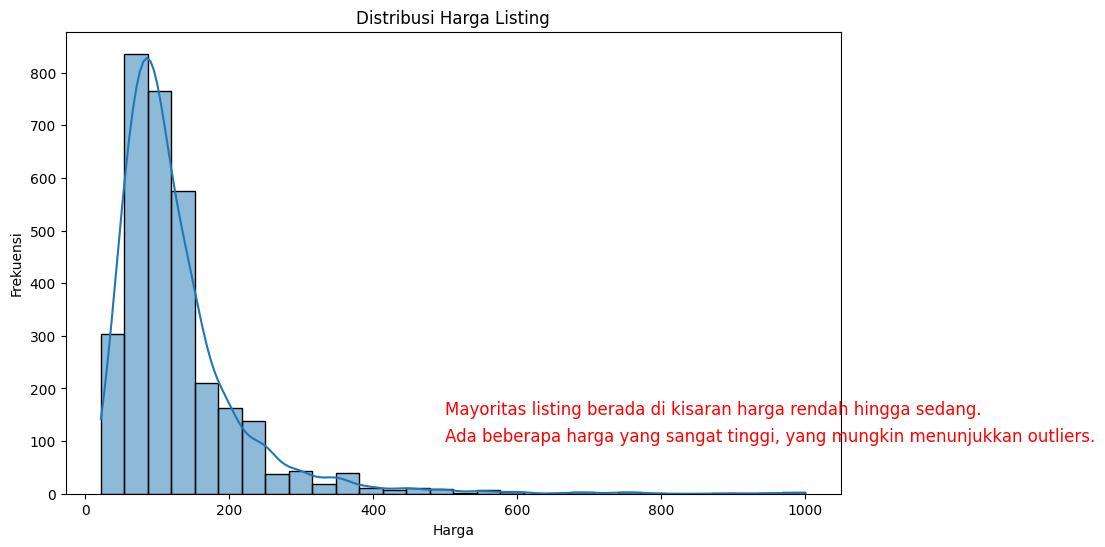

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi harga menggunakan histogram
plt.figure(figsize=(10,6))
sns.histplot(listings_df['price'], bins=30, kde=True)
plt.title('Distribusi Harga Listing')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.text(500, 150, 'Mayoritas listing berada di kisaran harga rendah hingga sedang.', fontsize=12, color='red')
plt.text(500, 100, 'Ada beberapa harga yang sangat tinggi, yang mungkin menunjukkan outliers.', fontsize=12, color='red')
plt.show()

# **3. Harga vs. Jumlah Ulasan (Price vs. Review Count)**

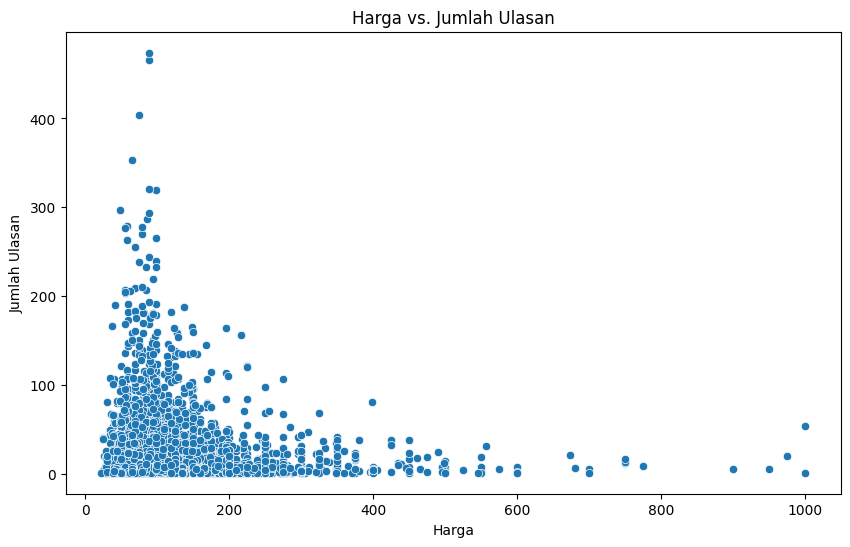

In [ ]:
# Menghitung jumlah review per listing_id
reviews_count = reviews_df.groupby('listing_id')['reviewer_id'].count().reset_index()
reviews_count.columns = ['listing_id', 'review_count']

# Menggabungkan dengan listings_df
listings_df = pd.merge(listings_df, reviews_count, on='listing_id', how='left', suffixes=('', '_reviews_count'))

# Menghapus baris yang memiliki NaN pada kolom 'price' atau 'review_count'
listings_df = listings_df.dropna(subset=['price', 'review_count'])

# Scatter plot antara harga dan jumlah ulasan
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='review_count', data=listings_df)
plt.title('Harga vs. Jumlah Ulasan')
plt.xlabel('Harga')
plt.ylabel('Jumlah Ulasan')
plt.show()

1.	Sebaran Data:

    a. Properti dengan harga lebih rendah tampaknya memiliki lebih banyak ulasan.

    b. Properti yang lebih mahal umumnya memiliki lebih sedikit ulasan, tetapi ada beberapa pengecualian.

2.	Korelasi:

    a. Jika pola menunjukkan tren naik, artinya properti dengan harga lebih tinggi lebih populer.

    b. Jika pola menyebar secara acak, maka harga tidak berpengaruh langsung terhadap jumlah ulasan.

3.	Outliers:

  a. 	Beberapa properti memiliki harga yang sangat tinggi tetapi dengan sedikit ulasan.

  b. Properti murah dengan banyak ulasan mungkin lebih populer di pasar.
  
Dari grafik ini, kita bisa menyimpulkan bahwa harga properti mungkin tidak menjadi faktor utama dalam menentukan jumlah ulasan, dan ada faktor lain seperti lokasi atau fasilitas yang lebih berpengaruh.



# **4. Heatmap Korelasi**

                                listing_id  scrape_id   host_id  \
listing_id                        1.000000        NaN  0.559608   
scrape_id                              NaN        NaN       NaN   
host_id                           0.559608        NaN  1.000000   
host_listings_count              -0.048141        NaN -0.097739   
host_total_listings_count        -0.048141        NaN -0.097739   
latitude                         -0.017038        NaN -0.017387   
longitude                         0.017464        NaN  0.000780   
accommodates                     -0.063911        NaN -0.090814   
bathrooms                        -0.060037        NaN -0.052749   
bedrooms                         -0.074249        NaN -0.076504   
beds                             -0.051591        NaN -0.060446   
square_feet                      -0.170017        NaN -0.180030   
price                            -0.055662        NaN -0.046948   
guests_included                  -0.092193        NaN -0.07147

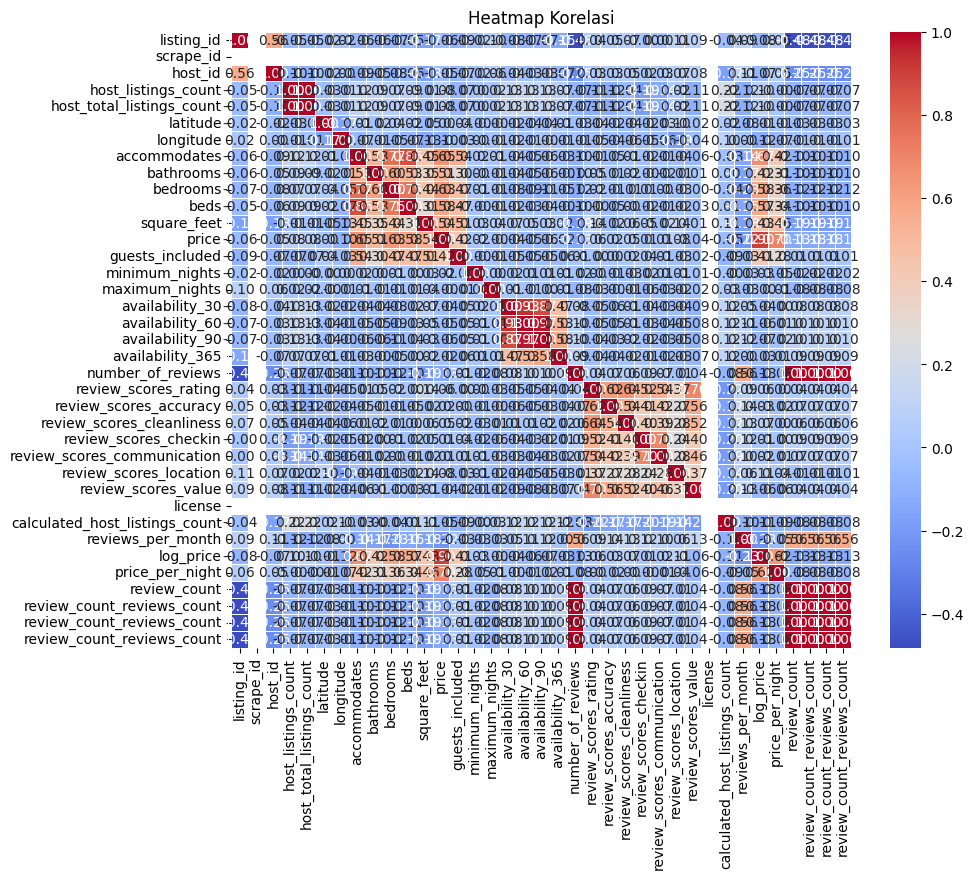

In [ ]:
# Select only numeric columns
numeric_columns = listings_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_columns.corr()

# Print the correlation matrix to verify
print(corr_matrix)

# Visualisasi korelasi menggunakan heatmap

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

:# **5. Harga vs. Tipe Kamar (Room Type)**

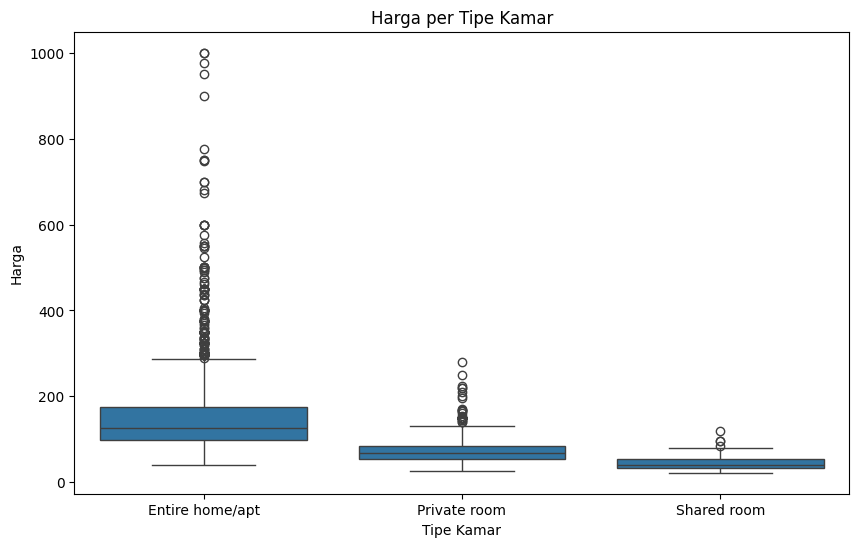

In [ ]:
# Boxplot untuk melihat harga per tipe kamar
plt.figure(figsize=(10,6))
sns.boxplot(x='room_type', y='price', data=listings_df)
plt.title('Harga per Tipe Kamar')
plt.xlabel('Tipe Kamar')
plt.ylabel('Harga')
plt.show()

# **6. Distribusi Waktu (Month & Weekday)**

<ipython-input-23-6c97b8606438>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='month', data=calendar_df, palette='Set2')


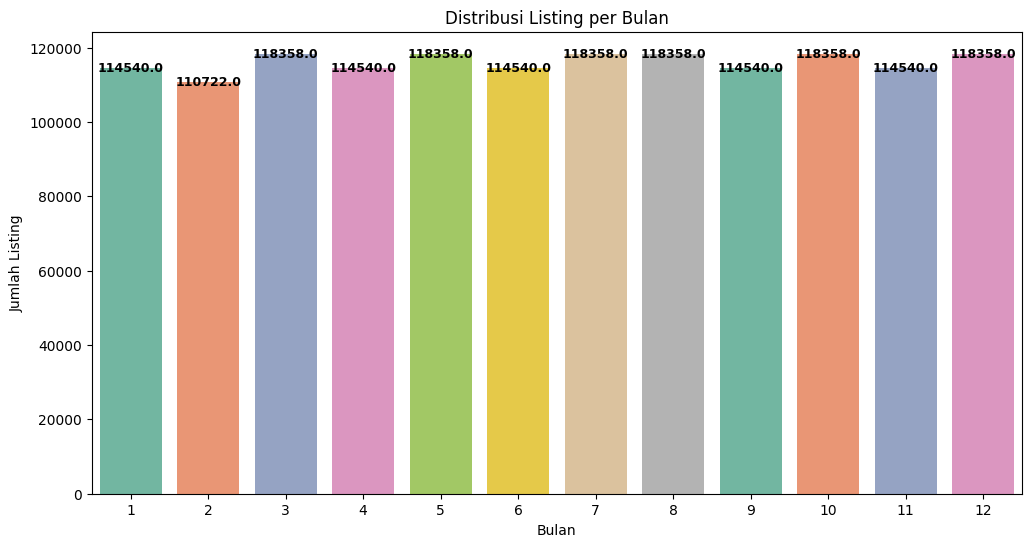

<ipython-input-23-6c97b8606438>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='weekday', data=calendar_df, palette='Set2')


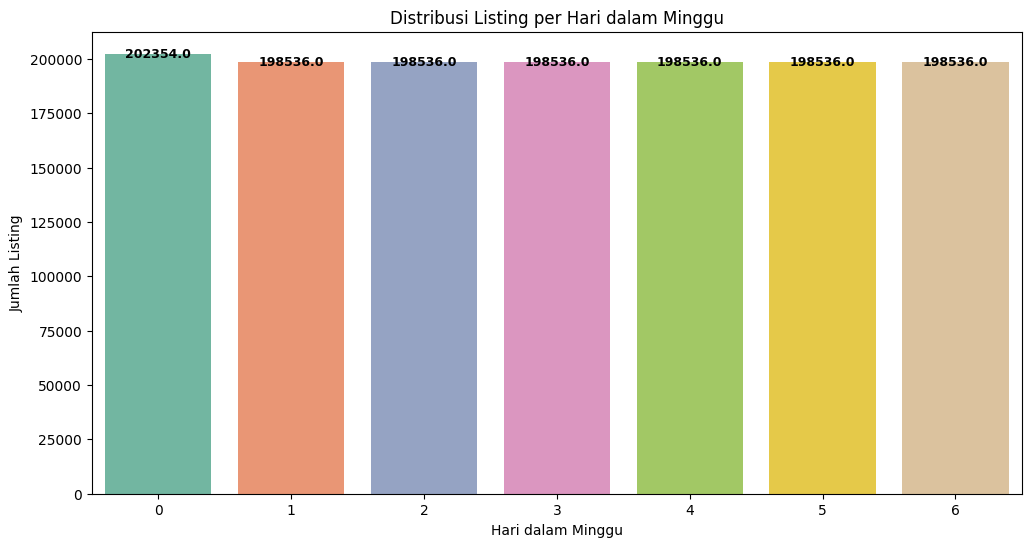

In [ ]:
# Plot distribusi bulan dan hari dalam minggu
plt.figure(figsize=(12,6))
ax = sns.countplot(x='month', data=calendar_df, palette='Set2')
# Menambahkan keterangan jumlah listing pada setiap bar
for p in ax.patches:
    # Menampilkan jumlah pada posisi tengah atas setiap bar
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', fontweight='bold')
plt.title('Distribusi Listing per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Listing')
plt.show()

plt.figure(figsize=(12,6))
ax=sns.countplot(x='weekday', data=calendar_df, palette='Set2')
# Menambahkan keterangan jumlah listing pada setiap bar
for p in ax.patches:
    # Menampilkan jumlah pada posisi tengah atas setiap bar
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', fontweight='bold')
plt.title('Distribusi Listing per Hari dalam Minggu')
plt.xlabel('Hari dalam Minggu')
plt.ylabel('Jumlah Listing')
plt.show()

# **7. Analisis Harga Berdasarkan Waktu**

   listing_id  price  month
0      241032   85.0      1
1      241032   85.0      1
2      241032   85.0      1
3      241032   85.0      1
4      241032   85.0      1
    month       price
0       1  127.098402
1       2  127.098402
2       3  127.098402
3       4  127.098402
4       5  127.098402
5       6  127.098402
6       7  127.098402
7       8  127.098402
8       9  127.098402
9      10  127.098402
10     11  127.098402
11     12  127.098402


<ipython-input-27-99e367822c59>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='price', data=monthly_avg_price, palette='Set2')


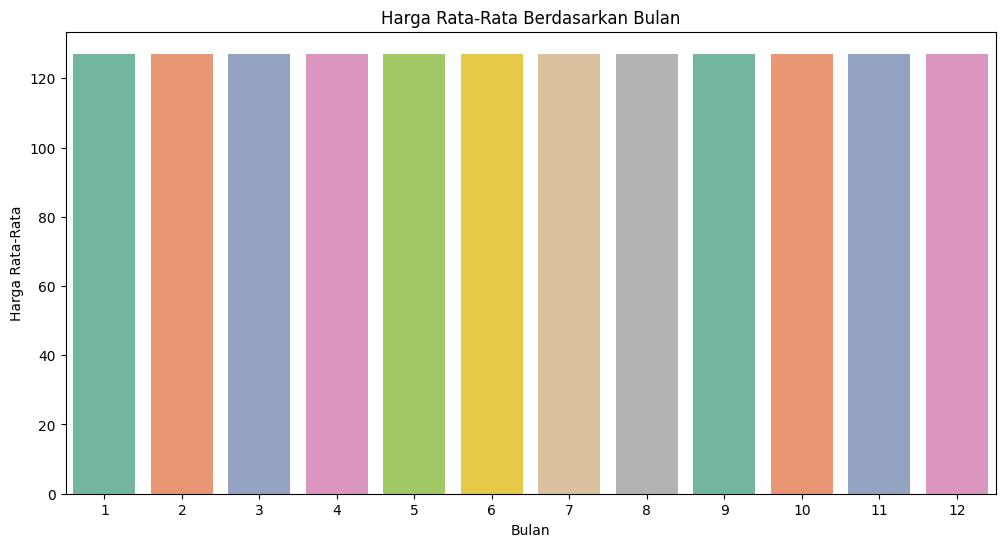

In [ ]:
# Merge listings_df with calendar_df to get the 'month' column
listings_with_month_df = pd.merge(listings_df, calendar_df[['listing_id', 'month']], on='listing_id', how='left')

# Check if the 'month' column is correctly merged
print(listings_with_month_df[['listing_id', 'price', 'month']].head())

# Group by 'month' and calculate the average price
monthly_avg_price = listings_with_month_df.groupby('month')['price'].mean().reset_index()

# Check the result
print(monthly_avg_price)

# Plot average price by month
plt.figure(figsize=(12,6))
sns.barplot(x='month', y='price', data=monthly_avg_price, palette='Set2')

plt.title('Harga Rata-Rata Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Harga Rata-Rata')
plt.show()

# **8. Boxplot Harga per Bin Harga**

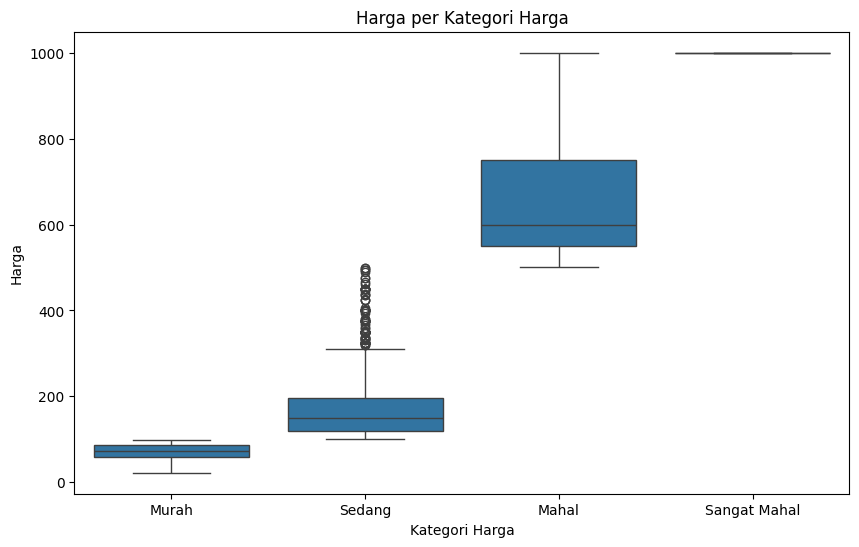

In [ ]:
# Boxplot harga berdasarkan bin harga
plt.figure(figsize=(10,6))
sns.boxplot(x='price_bin', y='price', data=listings_df)
plt.title('Harga per Kategori Harga')
plt.xlabel('Kategori Harga')
plt.ylabel('Harga')
plt.show()

import panBerdasarkan hasil analisis, kita bisa menarik beberapa insight seperti:

1. Distribusi Harga: Jika harga sebagian besar terdistribusi pada rentang tertentu, maka strategi pemasaran atau penetapan harga bisa difokuskan pada rentang harga tersebut.

2. Korelasi Harga dan Ulasan: Jika harga lebih tinggi berhubungan dengan jumlah ulasan, ini mungkin menunjukkan bahwa listing dengan harga lebih tinggi cenderung lebih populer atau lebih banyak dipilih.

3. Tipe Kamar: Boxplot akan menunjukkan perbedaan harga berdasarkan tipe kamar. Ini bisa memberi tahu kita strategi harga berdasarkan tipe kamar yang tersedia.

**Kesimpulan**

Dengan EDA ini, kita bisa mendapatkan pemahaman yang lebih dalam tentang dataset dan bagaimana faktor-faktor tertentu berhubungan dengan variabel target, seperti harga dan jumlah ulasan. Insight ini sangat berguna untuk bisnis dalam pengambilan keputusan, terutama dalam hal penetapan harga dan strategi pemasaran.



In [ ]:
import pandas as pd
from datetime import date
import seaborn as sns
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
import pandas as pd

# Load dataset
calendar_df = pd.read_csv('calendar.csv')

# Cek informasi awal dataset
print(calendar_df.info())

# Pastikan kolom price bertipe string sebelum memprosesnya
calendar_df['price'] = calendar_df['price'].astype(str)

# Hapus simbol dolar dan koma dari harga, isi NaN dengan 0, lalu ubah ke float
calendar_df['price'] = calendar_df['price'].str.replace(r'\$|,', '', regex=True)
calendar_df['price'] = calendar_df['price'].replace('nan', '0')  # Pastikan NaN dalam string juga diganti
calendar_df['price'] = calendar_df['price'].astype(float)

# Pastikan kolom date bertipe datetime sebelum mengekstrak bagian-bagiannya
calendar_df['date'] = pd.to_datetime(calendar_df['date'], errors='coerce')

# Ekstrak tahun, bulan, hari, dan nama hari
calendar_df['year'] = calendar_df['date'].dt.year
calendar_df['month'] = calendar_df['date'].dt.month
calendar_df['day'] = calendar_df['date'].dt.day
calendar_df['day_name'] = calendar_df['date'].dt.day_name()

# Konversi 'available' ke boolean (1 jika 't' atau 'T', 0 jika 'f' atau 'F')
calendar_df['available'] = calendar_df['available'].str.lower().map({'t': 1, 'f': 0})

# Cek hasil akhir
print(calendar_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB
None
   listing_id       date  available  price  year  month  day   day_name
0      241032 2016-01-04          1   85.0  2016      1    4     Monday
1      241032 2016-01-05          1   85.0  2016      1    5    Tuesday
2      241032 2016-01-06          0    0.0  2016      1    6  Wednesday
3      241032 2016-01-07          0    0.0  2016      1    7   Thursday
4      241032 2016-01-08          0    0.0  2016      1    8     Friday


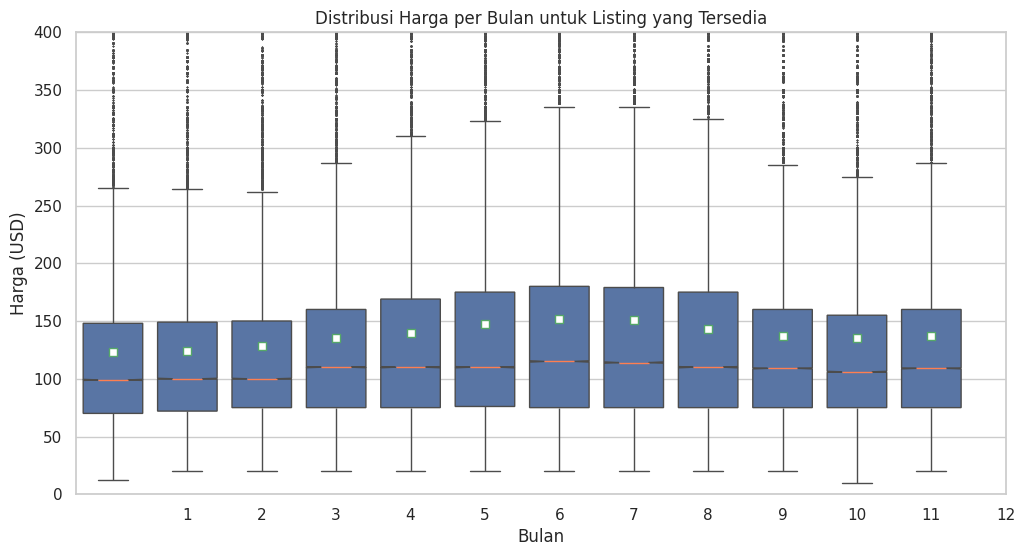

In [ ]:
# Pastikan 'available' bertipe integer
calendar_df['available'] = calendar_df['available'].astype(int)

# Filter hanya listing yang tersedia
avail_listing_cond = calendar_df['available'] == 1
avail_listing_df = calendar_df.loc[avail_listing_cond].copy()

# Pastikan 'month' bertipe integer agar urutannya benar
avail_listing_df['month'] = avail_listing_df['month'].astype(int)

# Set style seaborn
sns.set_theme(style="whitegrid")

# Plot distribusi harga berdasarkan bulan
fig, ax = plt.subplots(figsize=(12, 6))  # Gantilah plt.figure() dengan plt.subplots()

ax2_1 = sns.boxplot(
    data=avail_listing_df,
    x='month',
    y='price',
    order=range(1, 13),  # Pastikan urutan bulan benar
    fliersize=1,
    showmeans=True,
    flierprops={"marker": "x"},
    medianprops={"color": "coral"},
    notch=True,
    meanprops={"marker": "s", "markerfacecolor": "white"},
    ax=ax  # Pastikan plot berada di figure yang benar
)

# Perbaiki tick label bulan
ax2_1.set_xticks(range(1, 13))  # Pastikan tick ada di setiap bulan
ax2_1.set_xticklabels(range(1, 13))  # Set label bulan dengan angka 1-12

# Tambahkan judul dan label sumbu
ax2_1.set_title("Distribusi Harga per Bulan untuk Listing yang Tersedia")
ax2_1.set_xlabel("Bulan")
ax2_1.set_ylabel("Harga (USD)")
ax2_1.set_ylim(0, 400)

# Tampilkan plot
plt.show()

Text(0.5, 1.0, 'Distribution of listing from January to December')

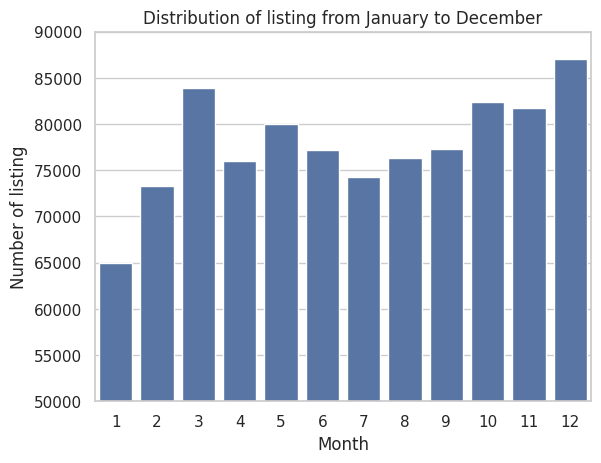

In [ ]:
# Display the number of the available listing.
list_mon_grouped = avail_listing_df.groupby('month').count()
ax2_2 = sns.barplot(x=list_mon_grouped.index.values, y=list_mon_grouped['listing_id'].values)
ax2_2.set_ylim(50000, 90000)
ax2_2.set_ylabel("Number of listing")
ax2_2.set_xlabel("Month")
ax2_2.set_title("Distribution of listing from January to December")

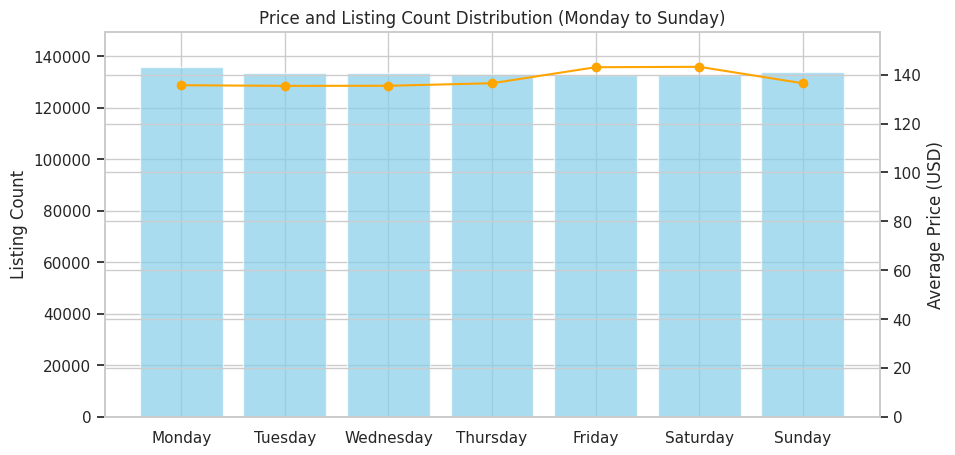

In [ ]:
# Urutan hari dalam seminggu
day_name_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Pastikan 'day_name' bertipe kategori agar urutan benar
avail_listing_df['day_name'] = avail_listing_df['day_name'].astype(CategoricalDtype(day_name_list))

# Hitung rata-rata harga per hari dengan observed=False
list_wd_avg_grouped = avail_listing_df.groupby('day_name', as_index=False, observed=False)['price'].mean()

# Hitung jumlah listing per hari dengan observed=False
list_wd_count_grouped = avail_listing_df.groupby('day_name', as_index=False, observed=False)['price'].count()

# Pastikan urutan sesuai hari dalam seminggu
list_wd_avg_grouped = list_wd_avg_grouped.sort_values('day_name')
list_wd_count_grouped = list_wd_count_grouped.sort_values('day_name')

# Plot bar chart dan line chart
fig, ax2_3_a = plt.subplots(figsize=(10, 5))

# Bar chart untuk jumlah listing
ax2_3_a.bar(list_wd_count_grouped['day_name'], list_wd_count_grouped['price'], color='skyblue', alpha=0.7)
ax2_3_a.set_ylabel("Listing Count")
ax2_3_a.set_title("Price and Listing Count Distribution (Monday to Sunday)")
ax2_3_a.set_ylim(0, list_wd_count_grouped['price'].max() * 1.1)  # Sedikit buffer atas

# Line chart untuk harga rata-rata
ax2_3_b = ax2_3_a.twinx()
ax2_3_b.plot(list_wd_avg_grouped['day_name'], list_wd_avg_grouped['price'], color='orange', marker='o', linestyle='-')
ax2_3_b.set_ylabel("Average Price (USD)")
ax2_3_b.set_ylim(0, list_wd_avg_grouped['price'].max() * 1.1)  # Buffer atas

ax2_3_b.set_xlabel("Day of the Week")

# Tampilkan plot
plt.show()


# +++++ Analysis on listing.csv +++++

In [ ]:
# load the listing.csv file and check the info of the file
listing_raw_df = pd.read_csv('listings.csv',
                             parse_dates=['host_since', 'last_scraped', 'first_review', 'last_review'])
print(listing_raw_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                3818 non-null   int64         
 1   listing_url                       3818 non-null   object        
 2   scrape_id                         3818 non-null   int64         
 3   last_scraped                      3818 non-null   datetime64[ns]
 4   name                              3818 non-null   object        
 5   summary                           3641 non-null   object        
 6   space                             3249 non-null   object        
 7   description                       3818 non-null   object        
 8   experiences_offered               3818 non-null   object        
 9   neighborhood_overview             2786 non-null   object        
 10  notes                             2212 non-null 

In [ ]:
# Cek informasi dataset
print("There are {} entries in this dataset".format(listing_raw_df.shape[0]))

# Hapus kolom URL yang tidak relevan
url_list = [
    'listing_url', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
    'host_url', 'host_thumbnail_url', 'host_picture_url'
]
listing_df = listing_raw_df.drop(columns=url_list)

# Hapus baris yang memiliki nilai NaN pada kolom `price`
listing_df.dropna(subset=['price'], inplace=True)

# Membersihkan nilai numerik dari karakter tidak diinginkan ($, %, ,)
numeric_column = [
    'price', 'weekly_price', 'monthly_price', 'cleaning_fee', 'extra_people',
    'security_deposit', 'host_response_rate', 'host_acceptance_rate'
]

listing_df[numeric_column] = listing_df[numeric_column].replace(r'\$|,|%', '', regex=True)

# Konversi ke tipe numerik dengan `apply`
listing_df[numeric_column] = listing_df[numeric_column].apply(
    lambda col: pd.to_numeric(col, errors="coerce", downcast='float')
).fillna(0)

# Konversi kolom tanggal menjadi jumlah hari sejak hari ini
today = pd.to_datetime(date.today())
date_related_col = ['host_since', 'last_scraped', 'first_review', 'last_review']

for date_col in date_related_col:
    listing_df[date_col] = (today - pd.to_datetime(listing_df[date_col])).dt.days

# Konversi persen menjadi float (misalnya 85% -> 0.85)
rate_column = ['host_response_rate', 'host_acceptance_rate']
listing_df[rate_column] = listing_df[rate_column] / 100

# Isi NaN dengan 0 untuk kolom numerik
num_listing_df = listing_df.select_dtypes(include=[np.number])
num_listing_df.fillna(0, inplace=True)

# Isi NaN dengan "None" untuk kolom string
str_listing_df = listing_df.select_dtypes(include=['object'])
str_listing_df.fillna('None', inplace=True)

# Konversi boolean
boolean_column = [
    'host_has_profile_pic', 'host_is_superhost', 'host_identity_verified',
    'has_availability', 'requires_license', 'instant_bookable',
    'require_guest_profile_picture', 'require_guest_phone_verification'
]

listing_df[boolean_column] = (
    listing_df[boolean_column]
    .astype(str)  # Pastikan semua nilai berbentuk string dulu
    .replace({'t': '1', 'f': '0'})  # Ubah 't' -> '1', 'f' -> '0'
    .replace({'nan': '0'})  # Pastikan NaN diganti dengan '0'
    .astype(int)  # Konversi ke integer
)

print("General data cleaning process finished!")
print(listing_df.info())


There are 3818 entries in this dataset
General data cleaning process finished!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 84 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   scrape_id                         3818 non-null   int64  
 2   last_scraped                      3818 non-null   int64  
 3   name                              3818 non-null   object 
 4   summary                           3641 non-null   object 
 5   space                             3249 non-null   object 
 6   description                       3818 non-null   object 
 7   experiences_offered               3818 non-null   object 
 8   neighborhood_overview             2786 non-null   object 
 9   notes                             2212 non-null   object 
 10  transit                           2884 non-null   obj

In [ ]:
# Handling categorical variables: 'amenities' & 'host_verifications'
listing_df['amenities'].replace(r'[\{\}\"\']', '', regex=True, inplace=True)
listing_df['host_verifications'].replace(r'[\[\]\"\'\s]', '', regex=True, inplace=True)

# Create dummies for the `amenities` column
ame_split_df = listing_df['amenities'].fillna('').str.split(',')
mlb = MultiLabelBinarizer()
ame_dummy = pd.DataFrame(mlb.fit_transform(ame_split_df), columns=mlb.classes_, index=ame_split_df.index)

# Remove empty column if it exists
if '' in ame_dummy.columns:
    ame_dummy.drop('', axis='columns', inplace=True)

room_prop_dummies = ame_dummy

# Create dummies for the `host_verification` column
hv_split_df = listing_df['host_verifications'].fillna('').str.split(',')
hv_dummy = pd.DataFrame(mlb.fit_transform(hv_split_df), columns=mlb.classes_, index=hv_split_df.index)

# Drop columns safely
hv_dummy.drop(['None', ''], axis='columns', errors='ignore', inplace=True)
room_prop_dummies = room_prop_dummies.join(hv_dummy)

# Select categorical columns
listing_cat_df = listing_df.select_dtypes(include=['object'])
listing_cat_count = listing_cat_df.nunique().sort_values(ascending=False)

# Select categorical features with 2-100 unique values
valid_categorical_features = listing_cat_count[listing_cat_count.between(2, 100, inclusive='both')]
print(valid_categorical_features)

# Select features for analysis
analysis_col_list = ['property_type', 'neighbourhood_group_cleansed', 'host_response_time', 'bed_type',
                     'host_identity_verified', 'room_type', 'cancellation_policy', 'host_has_profile_pic',
                     'host_is_superhost', 'is_location_exact']

# Filter only existing columns
valid_analysis_cols = [col for col in analysis_col_list if col in listing_df.columns]

# Create dummies
other_feature_dummies = pd.get_dummies(listing_df[valid_analysis_cols], prefix_sep='_', drop_first=True, dummy_na=False)
room_prop_dummies = room_prop_dummies.join(other_feature_dummies)

print("Categorical data cleaning process finished!")


neighbourhood_cleansed          87
neighbourhood                   81
calendar_updated                34
zipcode                         28
neighbourhood_group_cleansed    17
property_type                   16
city                             7
smart_location                   7
bed_type                         5
host_response_time               4
room_type                        3
cancellation_policy              3
state                            2
is_location_exact                2
dtype: int64
Categorical data cleaning process finished!


<ipython-input-15-7edc2ab3aeba>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  listing_df['amenities'].replace(r'[\{\}\"\']', '', regex=True, inplace=True)
<ipython-input-15-7edc2ab3aeba>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

<Axes: >

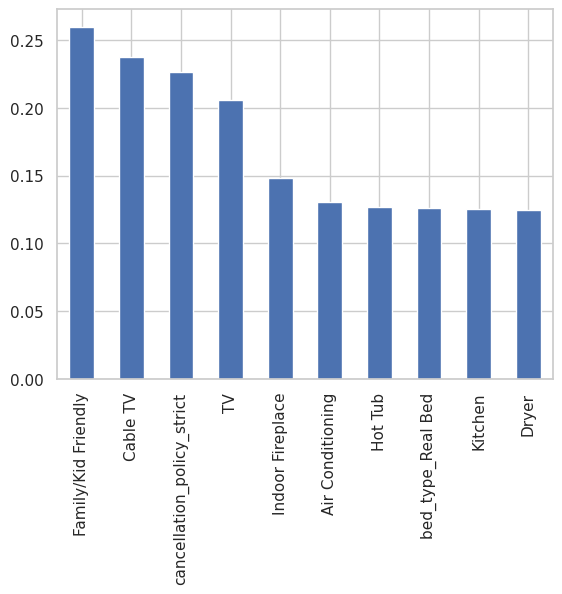

In [ ]:
# General view of the correlation between evaluation metrics and room properties
# The correlation between price and the room properties
prop_price_dum_df = room_prop_dummies.join(listing_df['price'])
prop_price_corr = prop_price_dum_df.corr()['price'].sort_values(ascending=False)
prop_price_corr.drop('price', inplace=True)
# Select the top 10 positive correlation features to display
prop_price_corr[prop_price_corr > 0].head(10).plot.bar()

<Axes: >

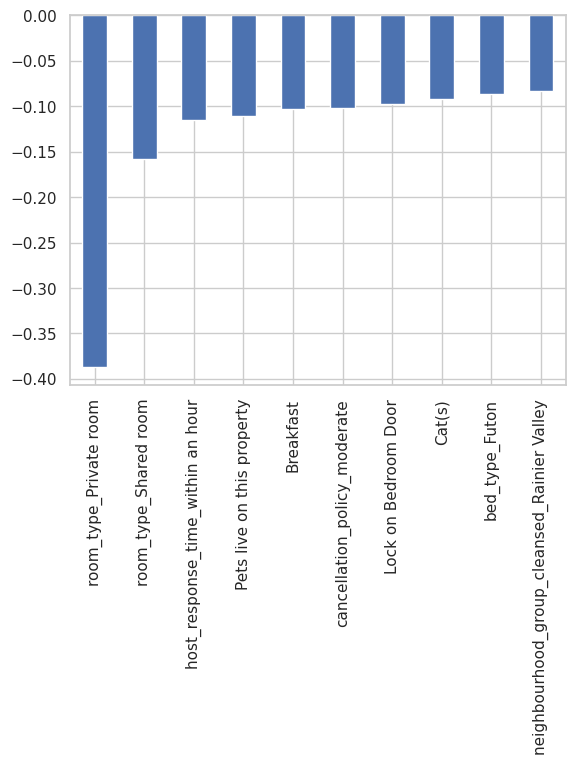

In [ ]:
# Select the top 10 negative correlation features to display
prop_price_corr[prop_price_corr < 0].tail(10).sort_values().plot.bar()

<Axes: >

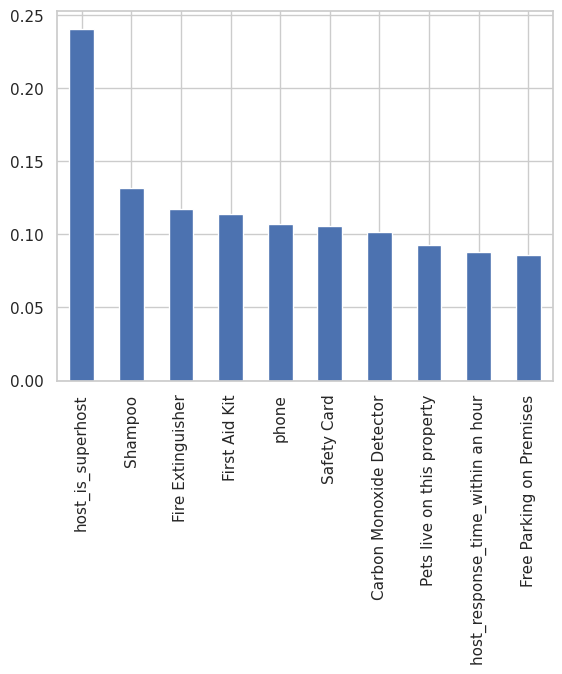

In [ ]:
# Correlation between reviews_rating and the room properties
prop_review_dum_df = room_prop_dummies.join(listing_df['review_scores_rating'])
prop_review_corr = prop_review_dum_df.corr()['review_scores_rating'].sort_values(ascending=False)
prop_review_corr.drop('review_scores_rating', inplace=True)
# Select the top 10 positive correlation features to display
prop_review_corr[prop_review_corr > 0].head(10).plot.bar()

<Axes: >

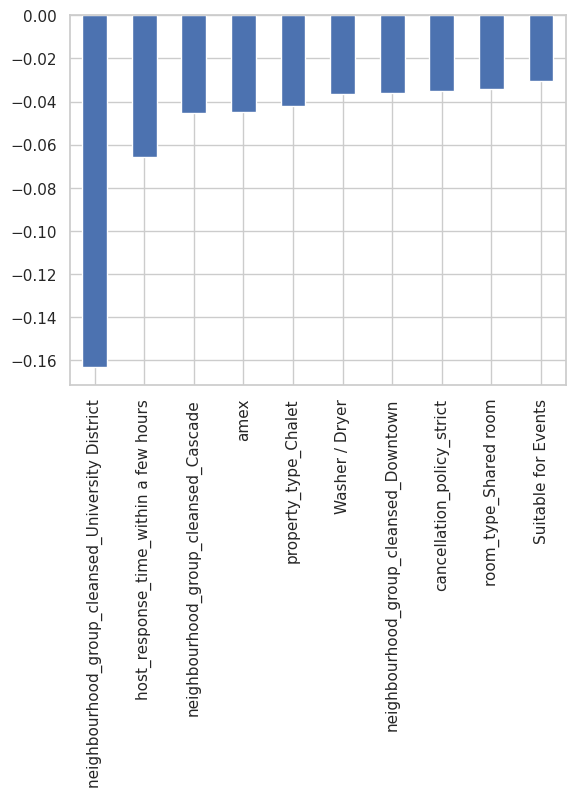

In [ ]:
# Select the top 10 negative correlation features to display
prop_review_corr[prop_review_corr < 0].tail(10).sort_values().plot.bar()

<Axes: >

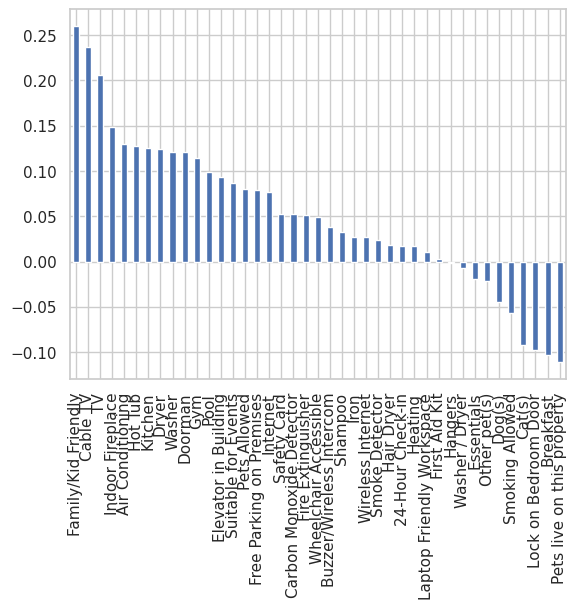

In [ ]:
# Deep dive in the correlation in room amenities
# Correlation between `amenities` and `price`
ame_price_dum_df = ame_dummy.join(listing_df['price'])
ame_price_corr = ame_price_dum_df.corr()['price'].sort_values(ascending=False)
ame_price_corr.drop('price', inplace=True)
ame_price_corr.plot.bar()

<Axes: >

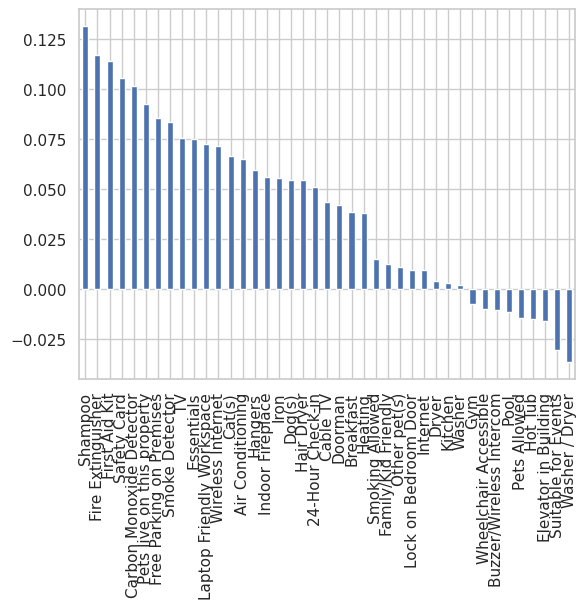

In [ ]:
# Correlation between `amenities` and `review_scores`
ame_review_dum_df = ame_dummy.join(listing_df['review_scores_rating'])
ame_review_corr = ame_review_dum_df.corr()['review_scores_rating'].sort_values(ascending=False)
ame_review_corr.drop('review_scores_rating', inplace=True)
ame_review_corr.plot.bar()

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'scrape_id'}>,
        <Axes: title={'center': 'last_scraped'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'host_since'}>,
        <Axes: title={'center': 'host_response_rate'}>,
        <Axes: title={'center': 'host_acceptance_rate'}>],
       [<Axes: title={'center': 'host_is_superhost'}>,
        <Axes: title={'center': 'host_listings_count'}>,
        <Axes: title={'center': 'host_total_listings_count'}>,
        <Axes: title={'center': 'host_has_profile_pic'}>,
        <Axes: title={'center': 'host_identity_verified'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'accommodates'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'beds'}>,
        <Axes: title={'center': 'square_feet'}>,
        <Axes: title={'center': 'p

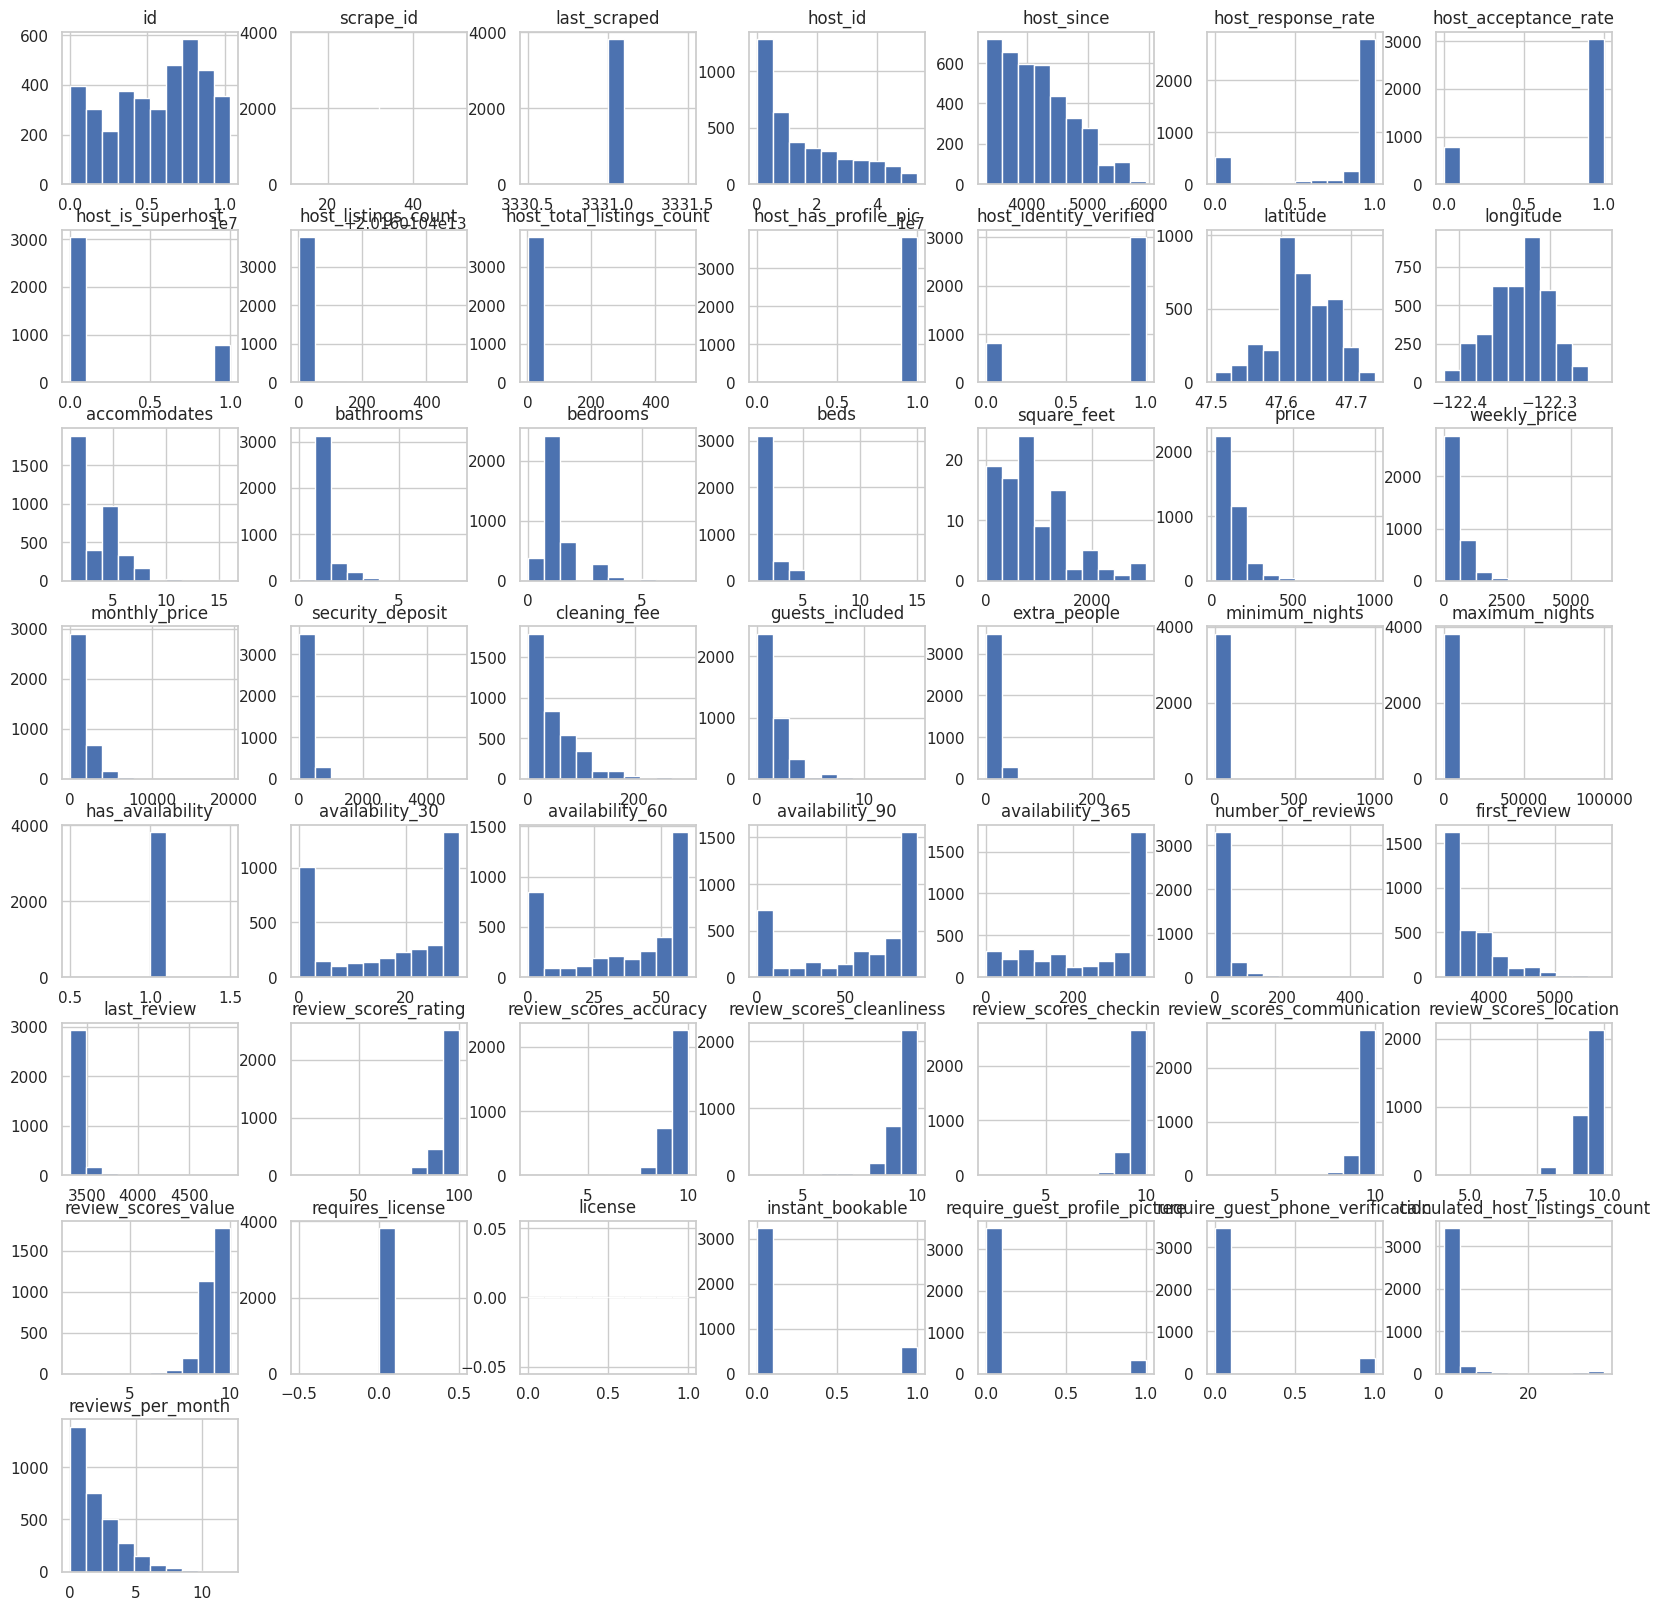

In [ ]:
# Check the distribution of all value & the correlation heat map
listing_df.hist(figsize=(20, 20))

Text(0.5, 1.0, 'Location and price distribution of all listings')

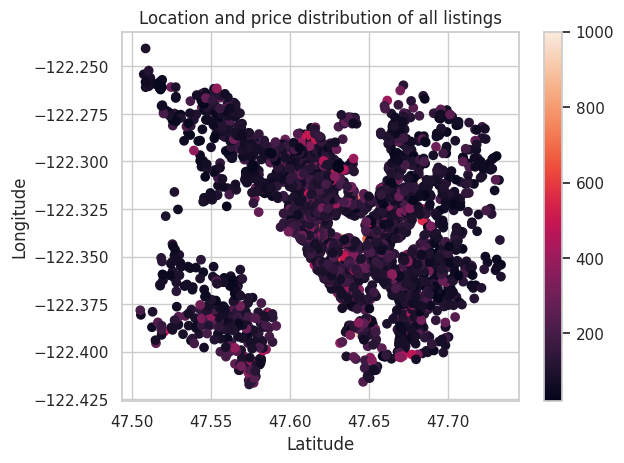

In [ ]:
# The scatter plot of latitude & longitude
plt.scatter(listing_df['latitude'], listing_df['longitude'], c=listing_df['price'])
plt.colorbar()
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Location and price distribution of all listings')

Text(0, 0.5, '# of listings')

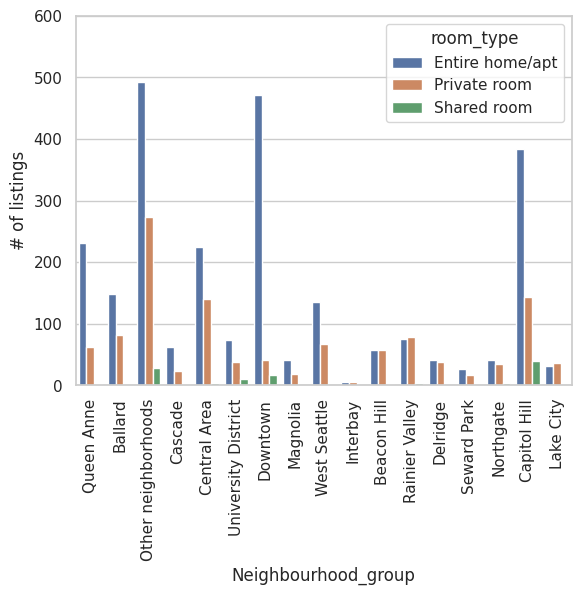

In [ ]:
# Deep dive into the average price of listing among different neighbourhood
# `nei` is stand for neighbourhood and `rt` is stand for room type
ax2_5_b_1 = sns.countplot(data=listing_df, x='neighbourhood_group_cleansed', hue='room_type')
ax2_5_b_1.tick_params(axis='x', rotation=90)
ax2_5_b_1.set_ylim(0, 600)
ax2_5_b_1.set_xlabel('Neighbourhood_group')
ax2_5_b_1.set_ylabel('# of listings')

(0.0, 500.0)

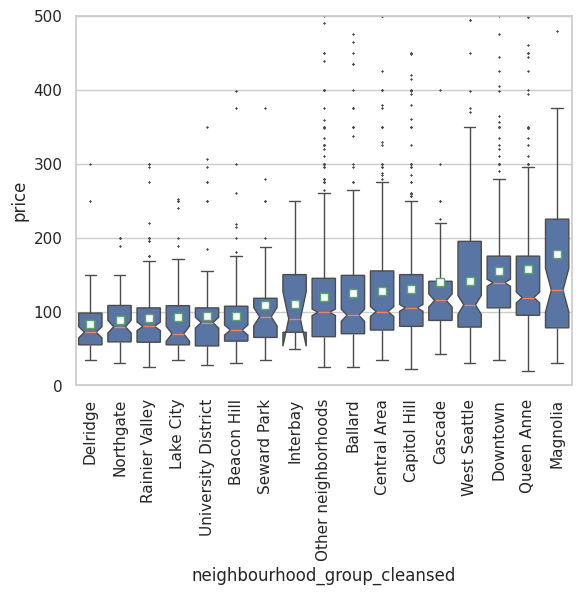

In [ ]:
order = listing_df.groupby(['neighbourhood_group_cleansed'])['price'].mean().sort_values().index.values
sns.boxplot(data=listing_df, x='neighbourhood_group_cleansed', y='price', fliersize=1, showmeans=True,
            flierprops={"marker": "x"}, medianprops={"color": "coral"}, notch=True, order=order,
            meanprops={"marker": "s", "markerfacecolor": "white"})
plt.xticks(rotation=90)
plt.ylim(0, 500)

# Analysis on reviews.csv

In [ ]:
# Load the reviews.csv file and check the info of the dataset
reviews_df = pd.read_csv('reviews.csv', parse_dates=['date'])

# General data cleaning
# fill Na value with "None" on Comments columns
reviews_df['comments'] = reviews_df['comments'].fillna("None")
print(reviews_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     84849 non-null  int64         
 1   id             84849 non-null  int64         
 2   date           84849 non-null  datetime64[ns]
 3   reviewer_id    84849 non-null  int64         
 4   reviewer_name  84849 non-null  object        
 5   comments       84849 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 3.9+ MB
None


In [ ]:
# Generate "Year"、“Month"、”Day“ columns according to the date column
reviews_df['Year'] = reviews_df['date'].dt.year
reviews_df['Month'] = reviews_df['date'].dt.month
reviews_df['Day'] = reviews_df['date'].dt.day
reviews_df['day_name'] = reviews_df['date'].dt.day_name()

# Join the listing_df
listing_join_list = ['id', 'price', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'cleaning_fee',
                     'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                     'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                     'review_scores_value']
review_info_df = pd.DataFrame(reviews_df.groupby('listing_id').count()['comments'].sort_values(ascending=False))
review_info_df = pd.merge(review_info_df, listing_df[listing_join_list], left_index=True, right_on='id')
review_info_df.rename({'comments': 'comment counts'}, axis=1, inplace=True)
print(review_info_df.head(10))

      comment counts      id  price neighbourhood_group_cleansed  \
1447             474  208356   89.0                     Downtown   
1441             466  365550   89.0                     Downtown   
3083             404   25002   75.0                      Ballard   
3600             353   47196   65.0                 Capitol Hill   
2568             320   63308   89.0                 Capitol Hill   
1499             319   92835   99.0                     Downtown   
2166             297    5682   48.0                     Delridge   
2690             294  279063   89.0                 Capitol Hill   
2456             287   53867   86.0          Other neighborhoods   
2668             279  841049   58.0                 Capitol Hill   

     property_type        room_type  cleaning_fee  review_scores_rating  \
1447          Loft     Private room           0.0                  95.0   
1441          Loft     Private room           0.0                  94.0   
3083         House  Entire

In [ ]:
# Some numeric facts on the reviews.csv dataset
# Numeric factors on reviews_df
# How many reviewers posted their comments
print("There are {} reviewers leave their comments.".format(reviews_df['reviewer_id'].unique().shape[0]))
# How many listings were commented
print("There are {} listings were commented.".format(reviews_df['listing_id'].unique().shape[0]))
# The TOP 10 commented listings
print("TOP 10 commented listing:\n")
print(review_info_df['comment counts'].head(10))

There are 75730 reviewers leave their comments.
There are 3191 listings were commented.
TOP 10 commented listing:

1447    474
1441    466
3083    404
3600    353
2568    320
1499    319
2166    297
2690    294
2456    287
2668    279
Name: comment counts, dtype: int64


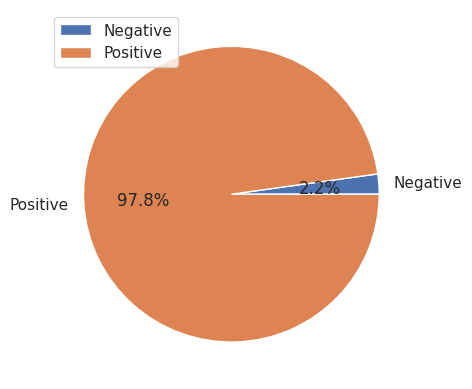

In [ ]:
# Reviews analysis
# Definition: For reviews score in detail, an 8+ score will be defined as a positive rating and a
# score under 8 will be seen as a negative rating.
# In terms of the score review rating, a score under 80 will be seen as a negative rating.

# Numeric facts
# The proportion of listing who gets the negative rating
neg_rating = review_info_df['review_scores_rating'][review_info_df['review_scores_rating'] < 80]
plt.pie([neg_rating.count(), review_info_df.shape[0] - neg_rating.count()], labels=['Negative', 'Positive'],
        autopct='%1.1f%%')
plt.legend()

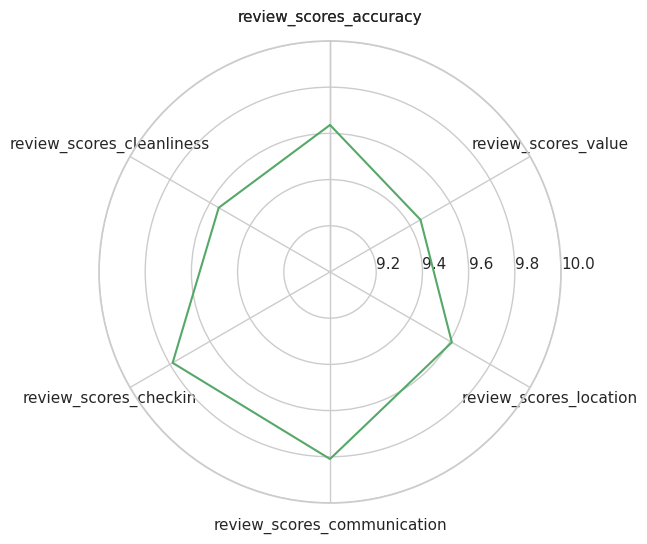

In [ ]:
# Radar map of review rating in details
detail_score_rating_l = ['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                         'review_scores_communication', 'review_scores_location', 'review_scores_value']
mean_score = review_info_df[detail_score_rating_l].mean(axis=0, skipna=True)

data_length = mean_score.shape[0]
angles = np.linspace(0, 2*np.pi, data_length, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))
labels = np.concatenate((mean_score.index.values, [mean_score.index.values[0]]))
scores = np.concatenate((mean_score.values, [mean_score.values[0]]))
fig = plt.figure(figsize=(8, 6), dpi=100)
ax_2_2_a_2 = plt.subplot(111, polar=True)
ax_2_2_a_2.plot(angles, scores, color='g')
ax_2_2_a_2.set_thetagrids(angles*180/np.pi, labels)
ax_2_2_a_2.set_theta_zero_location('N')
ax_2_2_a_2.set_rlim(9, 10)  # set the r limit from 9 to 10
ax_2_2_a_2.set_rlabel_position(270)